In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/brovey method/brovery_output/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/brovey method/brovery_output/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/brovey method/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/brovey method/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)


# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera

# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 19s 1s/step - loss: 2.0023 - accuracy: 0.1759 - val_loss: 1.9166 - val_accuracy: 0.2475
Epoch 2/15
16/16 [==============================] - 21s 1s/step - loss: 1.6788 - accuracy: 0.3665 - val_loss: 1.8077 - val_accuracy: 0.3000
Epoch 3/15
16/16 [==============================] - 24s 2s/step - loss: 1.4123 - accuracy: 0.4890 - val_loss: 1.6938 - val_accuracy: 0.3300
Epoch 4/15
16/16 [==============================] - 28s 2s/step - loss: 1.3709 - accuracy: 0.4926 - val_loss: 1.7083 - val_accuracy: 0.3800
Epoch 5/15
16/16 [==============================] - 25s 2s/step - loss: 1.1558 - accuracy: 0.5971 - val_loss: 1.6059 - val_accuracy: 0.3850
Epoch 6/15
16/16 [==============================] - 24s 2s/step - loss: 1.0843 - accuracy: 0.6021 - val_loss: 1.6396 - val_accuracy: 0.4100
Epoch 7/15
16/16 [==============================] - 24s 2s/step - loss: 0.9728 - accuracy: 0.6321 - val_loss: 1.4109 - val_accuracy: 0.4675
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 286ms/step - loss: 1.5356 - accuracy: 0.5025
[INFO] Accuracy: 50.25%
[INFO] Loss: 1.535616397857666
Time:  0:00:01.273284


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


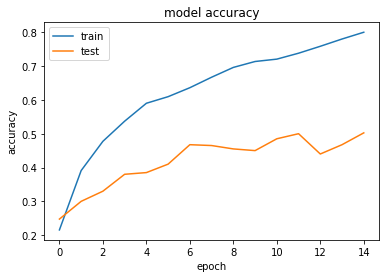

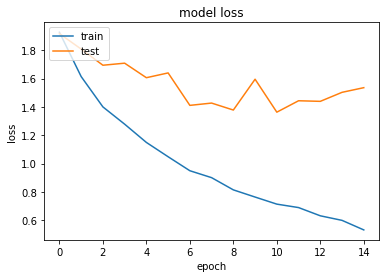

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: table_specs49_BH.jpg

probality of chair_bottle:  2.048384395436642e-06

probality of plate_bottle:  1.0458676459601524e-09

probality of spectacle_laptop:  89.1632616519928

probality of table_bottle:  1.874727109663077e-09

probality of table_chair:  0.003251246744184755

probality of table_laptop:  5.538620054721832

probality of table_plate:  4.8392450935352826e-05

probality of table_spectacle:  5.294820666313171


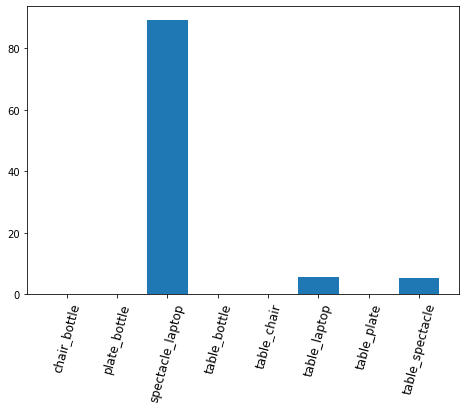

__________________________________________________________________
Input image: table_plate3_BH.jpg

probality of chair_bottle:  0.002751979809545446

probality of plate_bottle:  0.019689912733156234

probality of spectacle_laptop:  7.314160466194153

probality of table_bottle:  0.0020832274458371103

probality of table_chair:  0.10314263636246324

probality of table_laptop:  5.7603441178798676

probality of table_plate:  50.171250104904175

probality of table_spectacle:  36.62657141685486


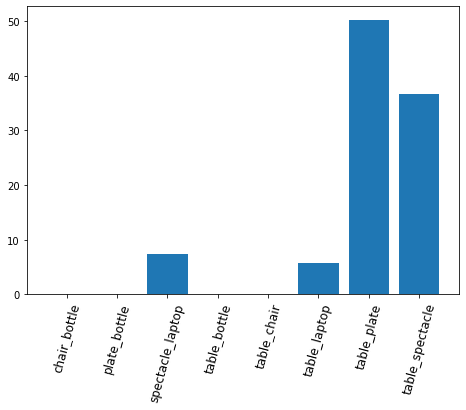

__________________________________________________________________
Input image: chair_bottle1_BH.jpg

probality of chair_bottle:  99.94159936904907

probality of plate_bottle:  0.024637533351778984

probality of spectacle_laptop:  1.1624779361341098e-06

probality of table_bottle:  0.03376535314600915

probality of table_chair:  1.4726347918880833e-07

probality of table_laptop:  4.001012845686325e-11

probality of table_plate:  1.4688096582849363e-13

probality of table_spectacle:  4.387185059684384e-11


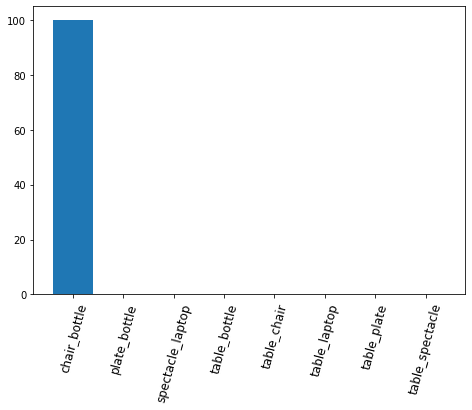

__________________________________________________________________
Input image: specs_laptop11_BH.jpg

probality of chair_bottle:  0.004807560253539123

probality of plate_bottle:  0.0004848152912018122

probality of spectacle_laptop:  78.50819230079651

probality of table_bottle:  0.026201384025625885

probality of table_chair:  0.716581754386425

probality of table_laptop:  19.146133959293365

probality of table_plate:  0.01906796678667888

probality of table_spectacle:  1.578538492321968


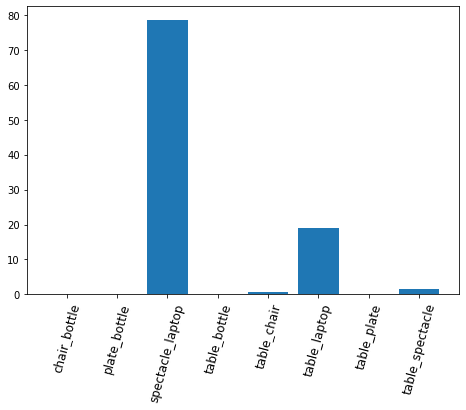

__________________________________________________________________
Input image: table_bottle9_BH.jpg

probality of chair_bottle:  10.48598513007164

probality of plate_bottle:  0.006009718345012516

probality of spectacle_laptop:  80.66549301147461

probality of table_bottle:  4.529259726405144

probality of table_chair:  0.42247576639056206

probality of table_laptop:  3.4483779221773148

probality of table_plate:  0.0075116040534339845

probality of table_spectacle:  0.4348886199295521


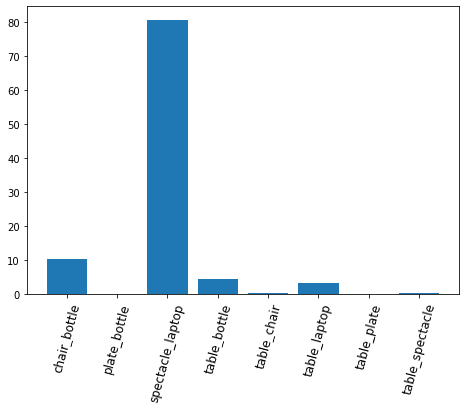

__________________________________________________________________
Input image: table_chair7_BH.jpg

probality of chair_bottle:  4.899087358012366e-06

probality of plate_bottle:  5.560527299025564e-10

probality of spectacle_laptop:  2.285664528608322

probality of table_bottle:  5.352981946593616e-08

probality of table_chair:  2.9306888580322266

probality of table_laptop:  78.68327498435974

probality of table_plate:  0.029211651417426765

probality of table_spectacle:  16.07115864753723


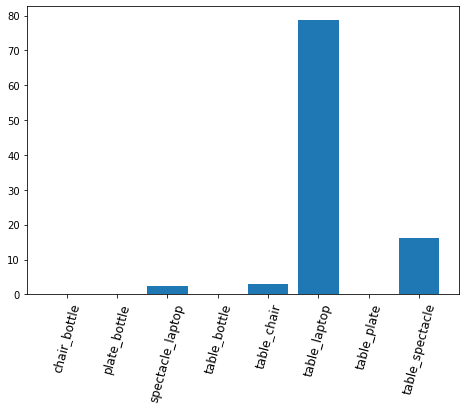

__________________________________________________________________
Input image: table_laptop29_BH.jpg

probality of chair_bottle:  0.0031732408388052136

probality of plate_bottle:  1.1678009315119198e-05

probality of spectacle_laptop:  38.3663535118103

probality of table_bottle:  8.857263082973077e-05

probality of table_chair:  3.0076541006565094

probality of table_laptop:  32.7319860458374

probality of table_plate:  0.026563898427411914

probality of table_spectacle:  25.86418390274048


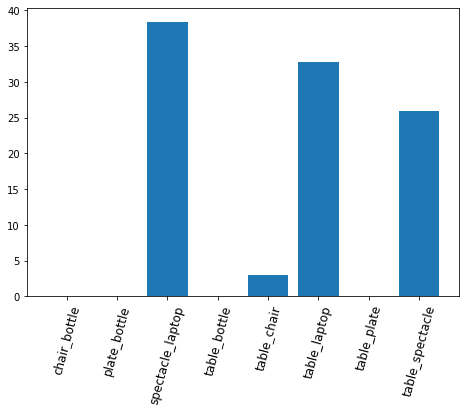

__________________________________________________________________
Input image: plate_bottle1_BH.jpg

probality of chair_bottle:  0.0014731666851730552

probality of plate_bottle:  99.9979019165039

probality of spectacle_laptop:  4.079753637142858e-05

probality of table_bottle:  0.0005069088729214855

probality of table_chair:  6.050269729662716e-08

probality of table_laptop:  7.379053965084204e-10

probality of table_plate:  2.305082915654566e-05

probality of table_spectacle:  5.0737781975840335e-05


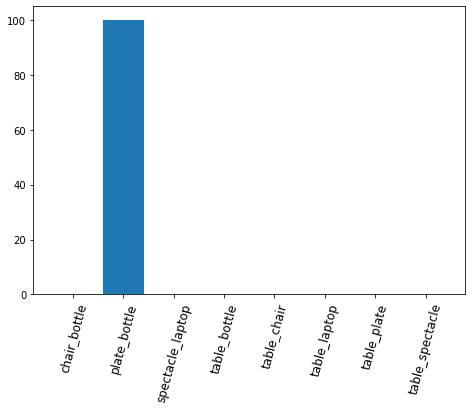

__________________________________________________________________


In [9]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'chair_bottle1_BH.jpg','plate_bottle1_BH.jpg','specs_laptop11_BH.jpg','table_bottle9_BH.jpg',
          'table_chair7_BH.jpg','table_laptop29_BH.jpg','table_plate3_BH.jpg','table_specs49_BH.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of chair_bottle: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of plate_bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of spectacle_laptop: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of table_bottle: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of table_chair: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of table_laptop: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of table_plate: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of table_spectacle: ", result[0][7]*100)
    
 # importing the required module
 import matplotlib.pyplot as plt
  
 fig = plt.figure()
 plt.rcParams['xtick.labelsize'] = 'large' 
 ax = fig.add_axes([0,0,1,1])    

 # x axis values
 x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.xticks(rotation=75)
 plt.show()   
    
 print("__________________________________________________________________")

 
 
    
 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_camera.predict([X1_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y1_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.63      0.72      0.67        50
    plate_bottle       0.84      0.98      0.91        50
spectacle_laptop       0.38      0.50      0.43        50
    table_bottle       0.62      0.16      0.25        50
     table_chair       0.47      0.16      0.24        50
    table_laptop       0.47      0.30      0.37        50
     table_plate       0.89      0.32      0.47        50
 table_spectacle       0.29      0.24      0.26        50

       micro avg       0.56      0.42      0.48       400
       macro avg       0.57      0.42      0.45       400
    weighted avg       0.57      0.42      0.45       400
     samples avg       0.42      0.42      0.42       400

Confusion Matrix
[[38  8  1  3  0  0  0  0]
 [ 1 49  0  0  0  0  0  0]
 [18  0 25  1  1  1  0  4]
 [33  1  7  8  0  1  0  0]
 [17  0  7  0  8 10  2  6]
 [14  0 11  1  3 15  0  6]
 [17  0  2  0  0  2 16 13]
 [17  0 13  0  

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


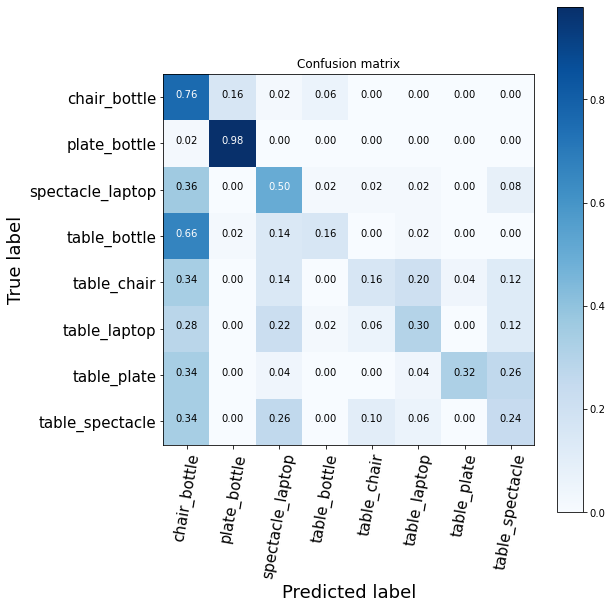

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)
    
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 